# Phase 1 - Lane Line Detection

### Pipeline Steps:
- Read photo
- Apply Pre-processing Techniques
- Extract edges with Sobel

### Import Libraries:

In [2]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

--------------------------------

### Implemented Functions:

In [3]:
def grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

In [4]:
def gaussian(img, kernel_size):
    """Applies Guassian filter on the image"""
    blurry = cv2.GaussianBlur(img, (kernel_size,kernel_size), 0)
    return blurry

In [5]:
def abs_sobel_thresh(img, orients='x', thresh_min=0, thresh_max=255):
    """
    This function takes the image and applies sobel filter to it to
    take gradients of the image
    """
    gray = grayscale(img)
    
    if(orients == 'x'):
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if(orients == 'y'):
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
        
    # rescale to 8 bits
    scaled_sobel = np.uint8((255*abs_sobel)/np.max(abs_sobel))
    
    # create a copy and apply threshold
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return binary_output

In [6]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    """
    a function to get the magnitude of the sobel
    """
    gray = grayscale(img)
    
    # Getting Sobel
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # get gradient magnitude
    grad_mag = np.sqrt(sobelx**2 + sobely**2)
    
    # rescale to 8 bit
    scale_factor = np.max(grad_mag)/255
    
    grad_mag = (grad_mag/scale_factor).astype(np.uint8)
    
    # create a copy and apply threshold
    binary_output = np.zeros_like(grad_mag)
    binary_output[(grad_mag >= mag_thresh[0]) & (grad_mag <= mag_thresh[1])] = 1
    
    return binary_output

--------------------------------------

### Step by Step Cells

In [7]:
test = 1 # flag to test

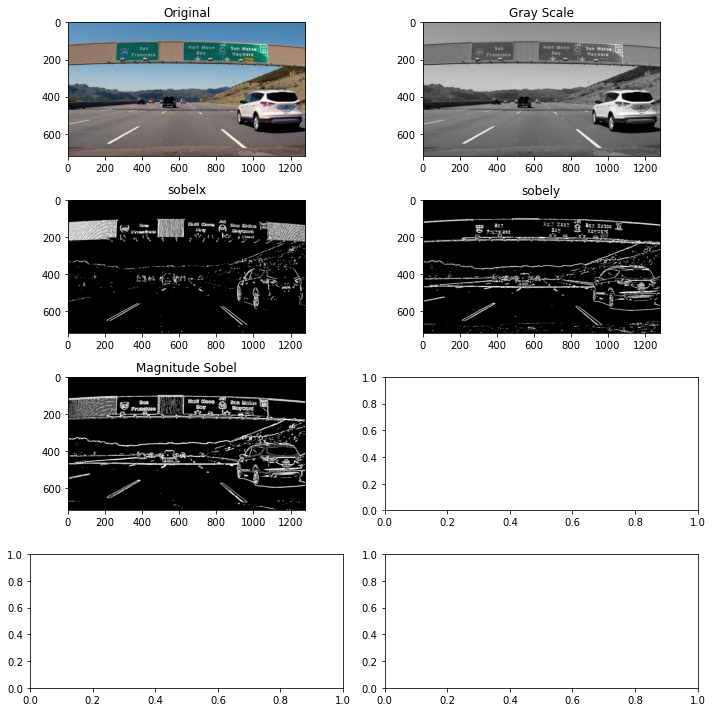

In [8]:
#file = os.path.join("test_images/", "test2.jpg")
image = cv2.imread("1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = grayscale(image)

#playing with sobel
grad_binary_x = abs_sobel_thresh(image, orients='x', thresh_min=20, thresh_max=100)
grad_binary_y = abs_sobel_thresh(image, orients='y', thresh_min=20, thresh_max=100)

# sobel magnitude thresholds
magthreshold = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))


if (test == 1):
    f, ax = plt.subplots(4,2, figsize=(10,10))
    
    ax[0,0].set_title('Original')
    ax[0,0].imshow(image)
    
    ax[0,1].set_title('Gray Scale')
    ax[0,1].imshow(gray, cmap = 'gray')
    
    ax[1,0].set_title('sobelx')
    ax[1,0].imshow(grad_binary_x, cmap = 'gray')
    
    ax[1,1].set_title('sobely')
    ax[1,1].imshow(grad_binary_y, cmap = 'gray')
    
    ax[2,0].set_title('Magnitude Sobel')
    ax[2,0].imshow(magthreshold, cmap = 'gray')
    
    f.tight_layout()
    plt.show()

<Figure size 720x720 with 0 Axes>

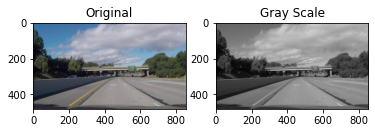

<Figure size 720x720 with 0 Axes>

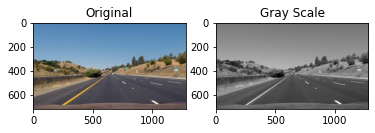

<Figure size 720x720 with 0 Axes>

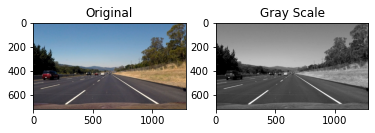

<Figure size 720x720 with 0 Axes>

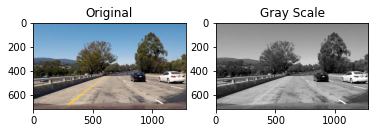

<Figure size 720x720 with 0 Axes>

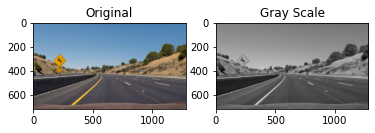

<Figure size 720x720 with 0 Axes>

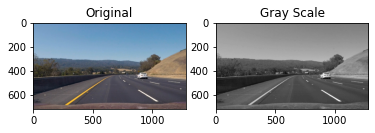

<Figure size 720x720 with 0 Axes>

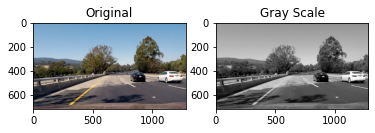

<Figure size 720x720 with 0 Axes>

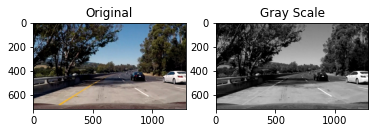

<Figure size 720x720 with 0 Axes>

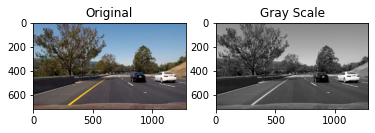

In [9]:
# Cell to read test photos
new_path = os.path.join("test_images/", "*jpg")

#images = []

for infile in glob.glob(new_path):
    image = infile
    orig_image = cv2.imread(image)
    rgb = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    #images.append(rgb)
    
    #Plots 
    plt.figure(figsize=(10,10))
    fig = plt.figure()
    a=fig.add_subplot(2,2,1)
    plt.imshow(rgb)
    a.set_title('Original')
    
    a=fig.add_subplot(2,2,2)
    plt.imshow(gray, cmap = 'gray')
    a.set_title('Gray Scale')